(chapters:data_exploration)=
# Data Exploration 

The first step in any Machine Learning pipeline is to get an idea of the data we are going to work with, and its properties. To do so we will use **pandas** library.
For visualizations instead, we will exploit **matplotlib** and **seaborn** libraries

In [1]:
import pandas as pd
df = pd.read_csv("dataset/online_shoppers_intention.csv")

## Features description

Our dataset is composed of 10 Numerical and 8 Categorical Features:

### Numerical Features

| Name | Description |
|:----:|:-----------:|
|**Administrative(_Duration)**|Number of account management pages visited by the user (and total time spent on those pages)|
|**Informational(_Duration)**|Number of account information pages visited by the user (and total time spent on those pages)|
|**ProductRelated(_Duration)**|Number of times the user visited a product related page (and the relative duration of the session)|
|**BounceRates**|Average bounce rate of the pages visited by the user (Percentage of users who enter the sate from that page and then leave without triggering any other request)|
|**ExitRates**|Average exit rate of the pages visited by the user (Percentage of users that saw that page as the last of the session)|
|**PageValues**|Average page value of the pages visited by the user (Indicates how much is a web page worth in money)|
|**SpecialDay**|Closeness of the visit time to a special day (e.g., Mother's Day, Prime Day)|

In [2]:
numerical_columns = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
df[numerical_columns].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### Categorical Features

| Name | Description |
|:----:|:-----------:|
|**OperatingSystem**|Operating system of the user|
|**Browser**|Browser of the user|
|**Region**|Geographic location of the user|
|**TrafficType**|Source traffic type that brought the user to the website|
|**VisitorType**|Whether the user is "new", "returning" or "other"|
|**Weekend**|Flag that raises if the visit date is a weekend|
|**Month**|Month of the visit date|
|**Revenue**|**TARGET** - Flag that raises if the session finished with a transaction|

The table below shows the amount of unique values for each categorical column

In [3]:
categorical_columns = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month", "Revenue"]
pd.DataFrame(df[categorical_columns].nunique(), columns=["Uniques"]).transpose()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month,Revenue
Uniques,8,13,9,20,3,2,10,2


## Missing values

In [4]:
pd.DataFrame(df.isnull().sum(), columns=["Missings"]).transpose()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Missings,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Lucky for us, we do not have to deal with any missing value.

## Outliers & Density

In order to better understand our (numerical) data, let's have a look at the Violin plots.

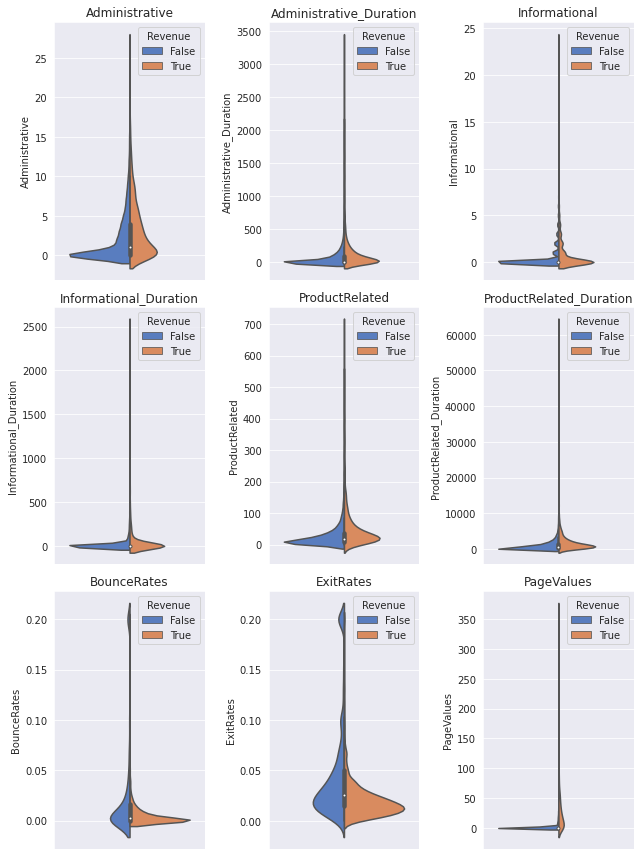

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

fig, ax = plt.subplots(3, 3, figsize=(9, 12))
ax = ax.ravel()

df["all"] = 1
for i, col in enumerate(numerical_columns):

    # Special day is actually discrete
    if col != "SpecialDay":
        sns.violinplot(data=df, x='all', y=col, ax=ax[i], hue="Revenue", palette="muted", split=True)
        ax[i].set_title(col)

        ax[i].axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

```{tip}
To know more about Violin Plots and what's really behind it, have a look at the Appendix, or click [here](appendix:violinplot)
```

The Violin plots show us that grouping our data on the target value, the distribution of most of our predictors varies considerably.
I.e. analyzing *PageValues*, for non-revenue sessions shows an important peak around the median value, while for revenue sessions the distribution is more spread out.

## Correlation

Correlation analysis aims to search for the presence of any statistical relationship between two random variables.

```{tip}
*Correlation* and *Causality* are often confused. The reality is that the causes underlying the correlation could be unknown.
Consequently, a correlation between two random variables is not sufficient to determine causal relationship.
```

### Numerical Columns: Pearson's Correlation Coefficient

Pearson's Correlation Coefficient is a way of measuring **Linear** correlation between two random variables. The coefficient *for a population* is defined as follows:

$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

Where:
* $\sigma _{X}$ and $\sigma _{Y}$ are standard deviations
* $\operatorname {cov}$ is the covariance

While the definition of the coefficient on a *sample* takes the following form:

$${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$$

Where:
* $n$ is the sample size
* $x_{i}$ and $y_{i}$ are sample points
* ${\bar {x}}$ is the sample mean

In this formula we basically replace the population variance and expected values with sample statistics

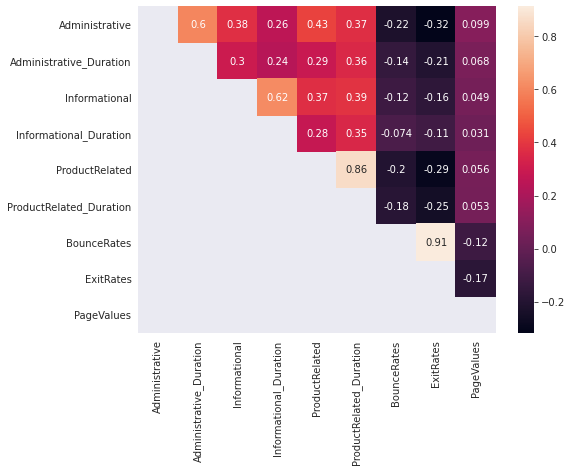

In [6]:
import numpy as np
numerical_columns = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues"]

corr = df[numerical_columns].corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

upper_mask = np.zeros_like(corr)
upper_mask[np.tril_indices_from(upper_mask)] = True

sns.heatmap(corr, mask=upper_mask, annot=True)

plt.show()

We can clearly see that the heatmap is (as expected) highlighting the linear correlation between the number of visits of a page type, and the time spent on it (i.e. *ProductRelated* and *ProductRelated_Duration*), but they

### Categorical Columns: Pearson's $\chi^2$ test

For categorical variables, we can not use the classic correlation coefficient as it does not make any sense.
For this reason, in order to study the dependence of our categorical variable, we perform a *Pearson's $\chi^2$ test of independence*, where we thest the *null hypothesis* that our data is *Independent*.

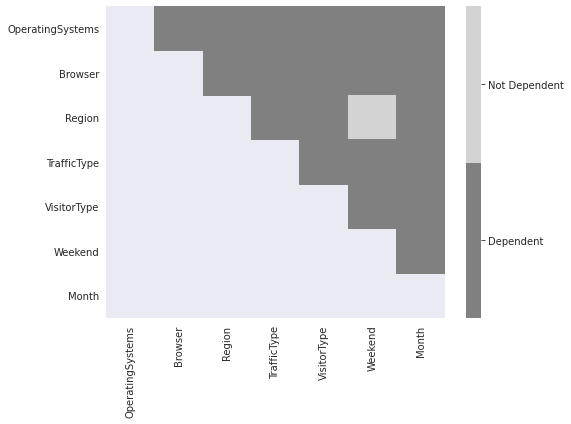

In [7]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency, chi2
from itertools import product

dep = []
categorical_columns=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]


# Define colors
colors = ["gray", "lightgray"]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

for i, (c1, c2) in enumerate(product(categorical_columns, repeat=2)):

    # Build contingency table
    crosstab = pd.crosstab(df[c1], df[c2])

    # Compute the test statistic
    chi, p, dof, expected = chi2_contingency(crosstab)

    # interpret test-statistic
    prob = 0.99
    critical = chi2.ppf(prob, dof)

    if abs(chi) >= critical:
        dep.append(0)
    else:
        dep.append(1)

# reshape the list to get a heatmap
indep = np.array(dep).reshape((len(categorical_columns), len(categorical_columns)))

# draw the heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
upper_mask = np.zeros_like(indep)
upper_mask[np.tril_indices_from(upper_mask)] = True
sns.heatmap(indep, xticklabels=categorical_columns, yticklabels=categorical_columns, mask=upper_mask, cmap=cmap, ax=ax)

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Dependent', 'Not Dependent'])

plt.tight_layout()
plt.show()

The above results are obtained with a 0.99 confidence interval, and they show that the only non dependent pair of features are *Region* and *Weekend*.

```{tip}
To know more about chi-squared tests and what's really behind it, have a look at the Appendix, or click [here](appendix:chi-squared)
```

## Class Balance

For classification problems class imbalance can have a negative impact on the prediction performance of our model.
For this reason is necessary to have an idea whether our samples are evenly distributed among our classes:

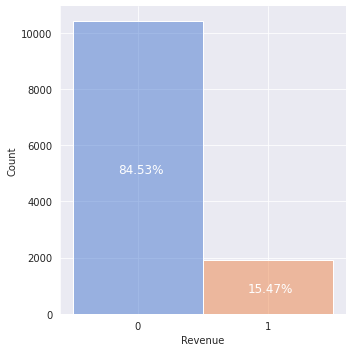

In [8]:
df['Revenue_str'] = df['Revenue'].astype('int').astype('str')

fg = sns.displot(x='Revenue_str' ,data=df, discrete=True, bins=[0, 1], hue='Revenue_str', legend=False, palette="muted")
fg.axes[0][0].text(-0.15, df['Revenue'].eq(0).sum()//2-200, f"{df['Revenue'].eq(0).sum()*100/df.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].text(1-0.15, df['Revenue'].eq(1).sum()//2-200, f"{df['Revenue'].eq(1).sum()*100/df.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].set_xlabel('Revenue')
plt.tight_layout()
plt.show()

df = df.drop(columns='Revenue_str');

The problem is clearly unbalanced towards negative samples (sessions without any purchase). This means that we will have to balance the dataset either by using *Oversampling* or *Undersampling* techniques.

The two main oversampling techniques are called SMOTE (Synthetic Monitoring Oversampling TEchnique) and ADASYN (ADAptive SYNthetic).
Both techniques are based on the same oversampling algorithm:

$${\displaystyle x_{new} = x_i + \lambda \times (x_{zi} - x_i)}$$


## Smote

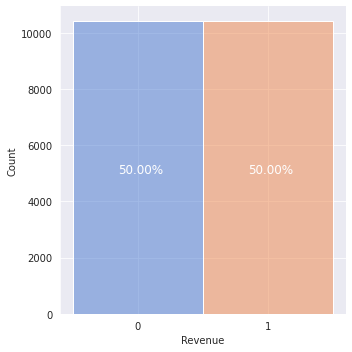

In [9]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OrdinalEncoder

# Transform categorical to ordinal
text_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']
enc = OrdinalEncoder()
df[text_columns] = enc.fit_transform(df[text_columns]).astype(int)

# get the smote object
sm = SMOTENC(categorical_features=[c in categorical_columns for c in df.columns], k_neighbors=5, random_state=42)

# Resample data
df_x, df_y = sm.fit_resample(df.drop(columns=['Revenue']), df['Revenue'])
df_y = pd.DataFrame({'Revenue': df_y})
df_y['Revenue_str'] = df_y['Revenue'].astype('int').astype('str')

# Plot class distribution
fg = sns.displot(x='Revenue_str' ,data=df_y, discrete=True, bins=[0, 1], hue='Revenue_str', legend=False, palette="muted")
fg.axes[0][0].text(-0.15, df_y['Revenue'].eq(0).sum()//2-200, f"{df_y['Revenue'].eq(0).sum()*100/df_y.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].text(1-0.15, df_y['Revenue'].eq(1).sum()//2-200, f"{df_y['Revenue'].eq(1).sum()*100/df_y.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].set_xlabel('Revenue')
plt.tight_layout()
plt.show()

Oversampling needs to be carreid out only on *training set*, and not on test set. The reason in that we want to provide our model with the same amount of information of the two classes while training, but we want to test it on the true distribution of the sample, because that is the distribution from which the real world observation will be sampled.

```{tip}
To know more about SMOTE and oversampling and what’s really behind it, have a look at the Appendix, or click [here](appendix:oversampling)
```